In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

from epoch_based_evolution import SearchSpace, Generation, run_generation
import load_data

# Load Data

In [2]:
X_train, y_train, X_val, y_val, X_test, y_test = load_data.get_preprocessed_data(dataset_id=12, scaling=True, random_seed=13, return_as='tensor')
input_size, output_size = load_data.get_tensor_sizes(X_train, y_train)

Class column is not numeric. Applying LabelEncoder.
Data loaded successfully! Format: tensor
Training data shape: torch.Size([1280, 216])


In [3]:
search_space = SearchSpace(
    input_size=input_size,
    output_size=output_size,          
    # min_layers=2,           # Minimum number of hidden layers
    # max_layers=5,           # Maximum number of hidden layers
    # min_neurons=16,         # Minimum neurons per layer
    # max_neurons=256,        # Maximum neurons per layer
    # activation_fns=[nn.ReLU, nn.LeakyReLU],  # Activation functions to sample
    # dropout_rates=[0, 0.1, 0.2],             # Dropout rates to sample
    # min_learning_rate=0.0001,                # Minimum learning rate
    # max_learning_rate=0.01,                  # Maximum learning rate
    # random_seeds=[42, 13, 2024],             # Random seeds for reproducibility
    # min_batch_size=32,                       # Minimum batch size
    # max_batch_size=512                       # Maximum batch size
)


# Build the first generation

# Experiments

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import time

In [19]:
plt.style.use('seaborn-v0_8-whitegrid')

# Use LaTeX-style font rendering
mpl.rcParams.update({
    "text.usetex": True, 
    "font.family": "serif", 
    "font.serif": ["Computer Modern"], 
    "axes.labelsize": 12, 
    "axes.titlesize": 14, 
    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10
})

In [6]:
import numpy as np

In [7]:
number_of_epochs = 10
percentile_drop = 25
start_time = time.time()
N_INDIVIDUALS = 2500

# Data storage for scatter plot
epoch_list = []
val_acc_list = []
val_loss_list = []

# Dictionary to count models per epoch
model_counts = {}
start_time = time.time()
generation = Generation(search_space, N_INDIVIDUALS)

for n_epoch in range(number_of_epochs + 1):
    print('\n-Epoch:', n_epoch)
    final_gen = run_generation(generation, 
                   X_train, y_train, X_val, y_val)
    
    num_models = len(final_gen.generation)
    model_counts[n_epoch] = num_models  # Store model count per epoch

    # Store all models' results
    for model_id in final_gen.generation:
        val_acc_list.append(final_gen.generation[model_id]['val_acc'])
        val_loss_list.append(final_gen.generation[model_id]['val_loss'])
        epoch_list.append(n_epoch)

    print(f"Survivor models: {num_models}")
    print(f'Val_Acc mean: {np.mean(val_acc_list)}')
    percentile_drop = 25 + n_epoch * 2  # Increase the percentile drop each epoch
final_time = time.time() - start_time
print('Final_time:', final_time)


-Epoch: 0
Survivor models: 2125
Val_Acc mean: 0.31295

-Epoch: 1
Survivor models: 1807
Val_Acc mean: 0.36287751144455743

-Epoch: 2
Survivor models: 1536
Val_Acc mean: 0.40926469915874175

-Epoch: 3
Survivor models: 1306
Val_Acc mean: 0.45404210953646296

-Epoch: 4
Survivor models: 1111
Val_Acc mean: 0.49753368738110343

-Epoch: 5
Survivor models: 945
Val_Acc mean: 0.5357644394110984

-Epoch: 6
Survivor models: 804
Val_Acc mean: 0.5672377776624454

-Epoch: 7
Survivor models: 684
Val_Acc mean: 0.5914751526458615

-Epoch: 8
Survivor models: 582
Val_Acc mean: 0.6101659977064219

-Epoch: 9
Survivor models: 495
Val_Acc mean: 0.6247548266783677

-Epoch: 10
Survivor models: 421
Val_Acc mean: 0.6362884542146242
Final_time: 877.1186947822571


In [17]:
plt.style.use('fast')

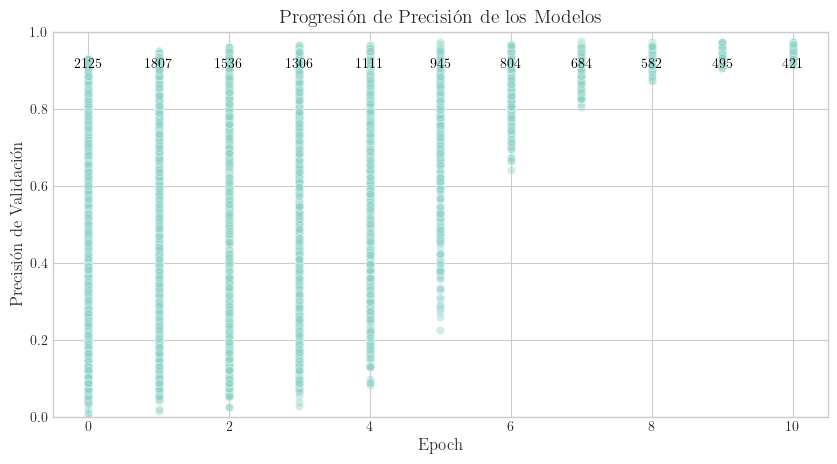

In [20]:

# Scatter plot for Accuracy
plt.figure(figsize=(10, 5))
sns.scatterplot(x=epoch_list, y=val_acc_list, alpha=0.4, edgecolor='white')

# Add model count annotations
for epoch, count in model_counts.items():
    plt.text(epoch, 0.9, str(count), ha='center', va='bottom', fontsize=10, color='black', transform=plt.gca().transData)

plt.xlabel('Epoch')
plt.ylabel('Precisión de Validación')
plt.title('Progresión de Precisión de los Modelos')
plt.ylim(0, 1)
plt.show()

In [10]:
import pandas as pd
pd.DataFrame(pd.DataFrame(final_gen.generation).loc['architecture'])


,architecture
0,"{'hidden_layers': [99, 321, 349], 'activation_..."
1,"{'hidden_layers': [306, 181, 104], 'activation..."
2,"{'hidden_layers': [453, 32, 171, 244], 'activa..."
3,"{'hidden_layers': [296, 68], 'activation_fn': ..."
4,"{'hidden_layers': [167, 205, 311], 'activation..."
...,...
416,"{'hidden_layers': [222, 443, 333, 66], 'activa..."
417,"{'hidden_layers': [38, 296], 'activation_fn': ..."
418,"{'hidden_layers': [280, 376, 462, 110], 'activ..."
419,"{'hidden_layers': [28, 61, 454], 'activation_f..."


In [12]:
# Extract val_Accuracy values
val_accuracies = [final_gen.generation[gen]['val_acc'] for gen in final_gen.generation]

# Calculate the mean val_loss
mean_val_acc = sum(val_accuracies) / len(val_accuracies)
# Print the mean val_loss
print("Mean val_acc:", mean_val_acc)

Mean val_acc: 0.9484634798099763


<Axes: >

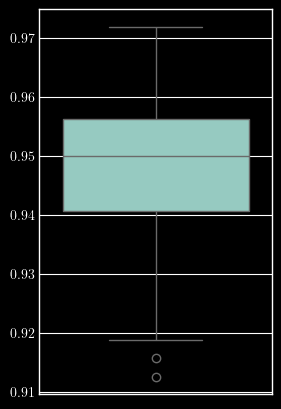

In [13]:
plt.figure(figsize=(3,5))
sns.boxplot(val_accuracies)

In [14]:
final_gen.drop_all_except_best()
final_gen.train_best_individual(train_loader, num_epochs=50)

NameError: name 'train_loader' is not defined

In [ ]:
final_gen.generation[0]

{'model': DynamicNN(
   (network): Sequential(
     (0): Linear(in_features=216, out_features=287, bias=True)
     (1): LeakyReLU(negative_slope=0.01)
     (2): Dropout(p=0.5, inplace=False)
     (3): Linear(in_features=287, out_features=389, bias=True)
     (4): LeakyReLU(negative_slope=0.01)
     (5): Dropout(p=0.5, inplace=False)
     (6): Linear(in_features=389, out_features=325, bias=True)
     (7): LeakyReLU(negative_slope=0.01)
     (8): Dropout(p=0.5, inplace=False)
     (9): Linear(in_features=325, out_features=10, bias=True)
   )
   (criterion): CrossEntropyLoss()
 ),
 'architecture': {'hidden_layers': [287, 389, 325],
  'activation_fn': torch.nn.modules.activation.LeakyReLU,
  'dropout_rate': 0.5,
  'optimizer_type': torch.optim.adam.Adam,
  'learning_rate': 0.003822040796383871,
  'batch_size': 256,
  'random_seed': 1337},
 'train_loss': 0.016787918284535408,
 'train_acc': 0.99375,
 'val_loss': 0.16033610701560974,
 'val_acc': 0.95625}

In [ ]:
test_loss, test_accuracy = final_gen.generation[0]['model'].evaluate(test_loader)

In [ ]:
test_loss, test_accuracy

(0.1422114223241806, 0.9675)